# EDA

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
df = pd.read_csv('Model_data.csv', index_col='Unnamed: 0')

In [4]:
df.head()

,State_name,County_name,Tract,Med_HHD_Inc_ACS_09_13,Med_House_value_ACS_09_13,has_superfund,pct_Not_HS_Grad_ACS_09_13,pct_Born_foreign_ACS_09_13,pct_Born_US_ACS_09_13,pct_PUB_ASST_INC_ACS_09_13,...,Employed,Unemployed,Emp_Unemp_Ratio,Hispanic_Income,White_Income,Black_Income,Asian_Income,AIAN_Income,SOR_Income,NHOPI_Income
0,Alabama,Autauga County,20100,63030.0,124800.0,0,19.277108,0.276549,99.723451,0.000000,...,870.0,25.0,34.800000,2773320.0,100911030.0,13677510.0,882420.0,819390.0,0.0,0.0
1,Alabama,Autauga County,20200,44019.0,129200.0,0,23.149394,3.057325,96.942675,0.720288,...,880.0,159.0,5.534591,3301425.0,37152036.0,53439066.0,220095.0,220095.0,0.0,0.0
2,Alabama,Autauga County,20300,43201.0,113800.0,0,11.432571,3.990841,96.009159,3.469211,...,1455.0,54.0,26.944444,3758487.0,109644138.0,27951047.0,734417.0,388809.0,0.0,216005.0
3,Alabama,Autauga County,20400,54730.0,130500.0,0,10.255570,2.566432,97.433568,0.971429,...,1929.0,251.0,7.685259,4652050.0,220561900.0,10453430.0,985140.0,602030.0,3283800.0,164190.0
4,Alabama,Autauga County,20500,65132.0,177000.0,0,4.369356,2.792369,97.207631,4.737733,...,5059.0,282.0,17.939716,23121860.0,549583816.0,92357176.0,19213940.0,2865808.0,0.0,390792.0


In [5]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

What I realized when conducting my model building is that my model is performing relatively well with its sensitivity. But when it comes to
precision, it is almost at zero for all my models, which means it is detecting almost everything as positive.

In [42]:
with_superfund = df[df['has_superfund'] == 1]

In [43]:
without_superfund = df[df['has_superfund'] == 0]

In [7]:
with_superfund.shape[0]

1168

In [8]:
without_superfund.shape[0]

69051

In [9]:
with_superfund.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

In [10]:
without_superfund.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


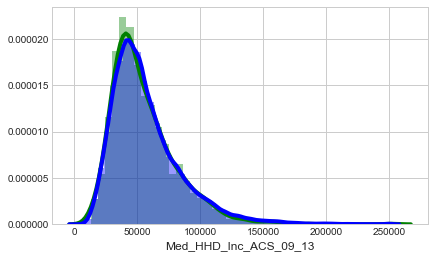

In [11]:
sns.distplot(with_superfund.Med_HHD_Inc_ACS_09_13, color='green')
sns.distplot(without_superfund.Med_HHD_Inc_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


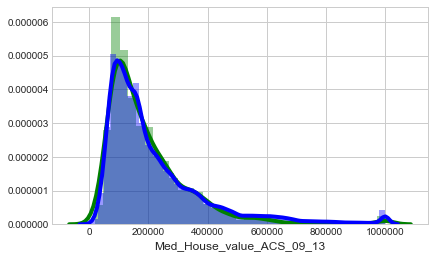

In [12]:
sns.distplot(with_superfund.Med_House_value_ACS_09_13, color='green')
sns.distplot(without_superfund.Med_House_value_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


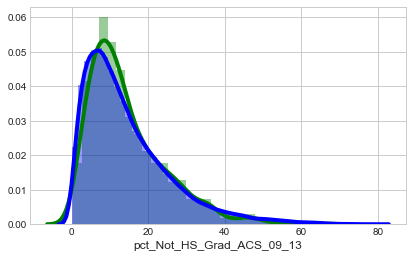

In [13]:
sns.distplot(with_superfund.pct_Not_HS_Grad_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_Not_HS_Grad_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


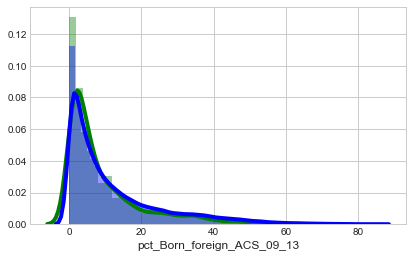

In [14]:
sns.distplot(with_superfund.pct_Born_foreign_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_Born_foreign_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


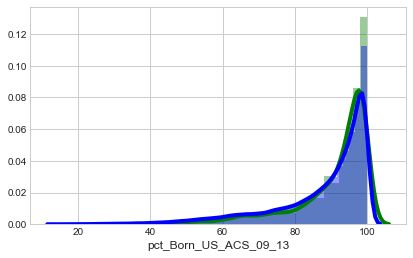

In [15]:
sns.distplot(with_superfund.pct_Born_US_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_Born_US_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


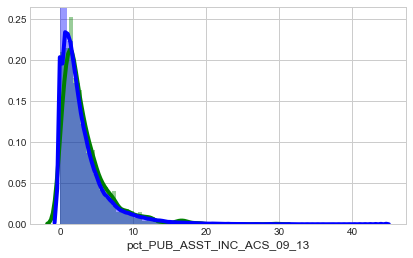

In [16]:
sns.distplot(with_superfund.pct_PUB_ASST_INC_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_PUB_ASST_INC_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


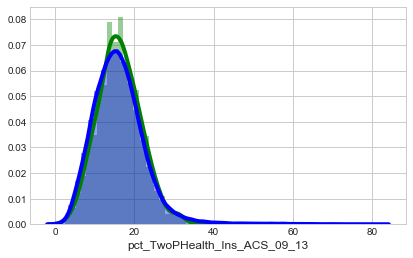

In [17]:
sns.distplot(with_superfund.pct_TwoPHealth_Ins_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_TwoPHealth_Ins_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


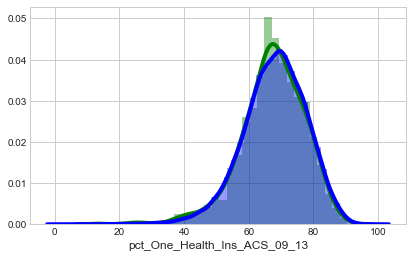

In [18]:
sns.distplot(with_superfund.pct_One_Health_Ins_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_One_Health_Ins_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


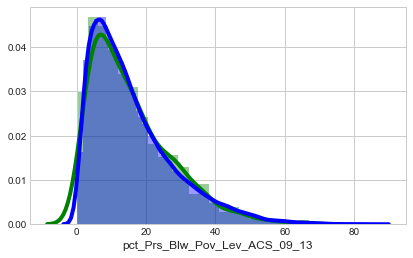

In [19]:
sns.distplot(with_superfund.pct_Prs_Blw_Pov_Lev_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_Prs_Blw_Pov_Lev_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


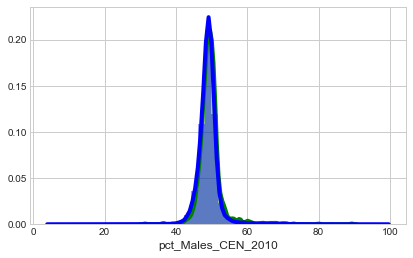

In [20]:
sns.distplot(with_superfund.pct_Males_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Males_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


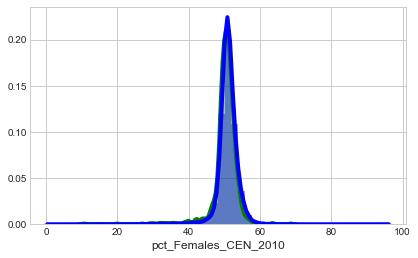

In [21]:
sns.distplot(with_superfund.pct_Females_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Females_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


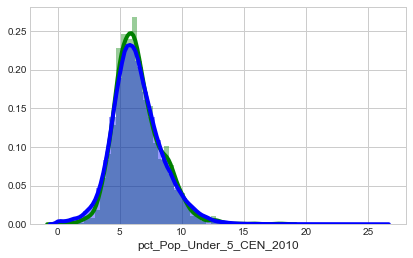

In [22]:
sns.distplot(with_superfund.pct_Pop_Under_5_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Pop_Under_5_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


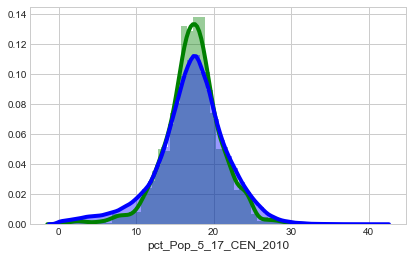

In [23]:
sns.distplot(with_superfund.pct_Pop_5_17_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Pop_5_17_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


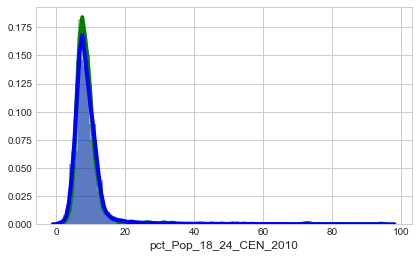

In [24]:
sns.distplot(with_superfund.pct_Pop_18_24_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Pop_18_24_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


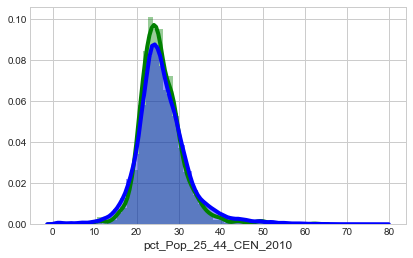

In [25]:
sns.distplot(with_superfund.pct_Pop_25_44_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Pop_25_44_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


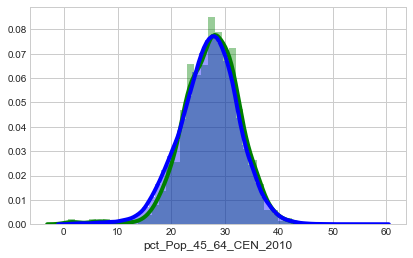

In [26]:
sns.distplot(with_superfund.pct_Pop_45_64_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Pop_45_64_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


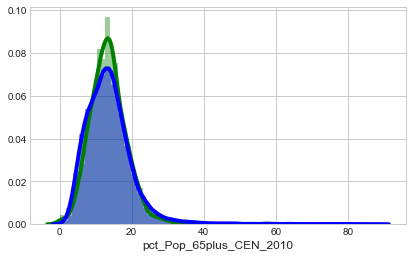

In [27]:
sns.distplot(with_superfund.pct_Pop_65plus_CEN_2010, color='green')
sns.distplot(without_superfund.pct_Pop_65plus_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


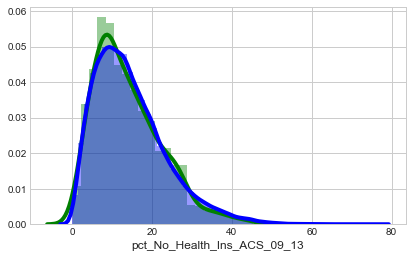

In [28]:
sns.distplot(with_superfund.pct_No_Health_Ins_ACS_09_13, color='green')
sns.distplot(without_superfund.pct_No_Health_Ins_ACS_09_13, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


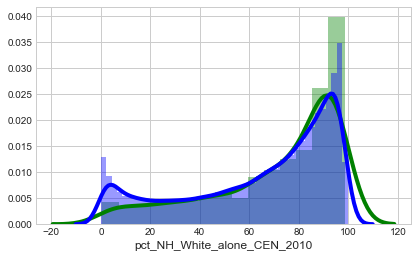

In [29]:
sns.distplot(with_superfund.pct_NH_White_alone_CEN_2010, color='green')
sns.distplot(without_superfund.pct_NH_White_alone_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


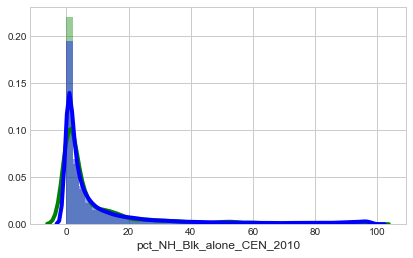

In [30]:
sns.distplot(with_superfund.pct_NH_Blk_alone_CEN_2010, color='green')
sns.distplot(without_superfund.pct_NH_Blk_alone_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


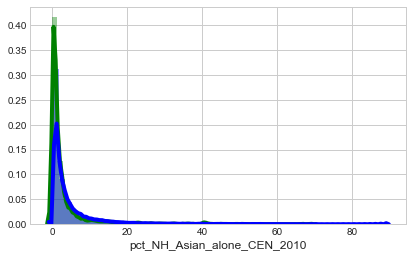

In [31]:
sns.distplot(with_superfund.pct_NH_Asian_alone_CEN_2010, color='green')
sns.distplot(without_superfund.pct_NH_Asian_alone_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


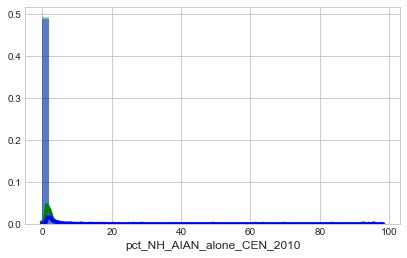

In [32]:
sns.distplot(with_superfund.pct_NH_AIAN_alone_CEN_2010, color='green')
sns.distplot(without_superfund.pct_NH_AIAN_alone_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


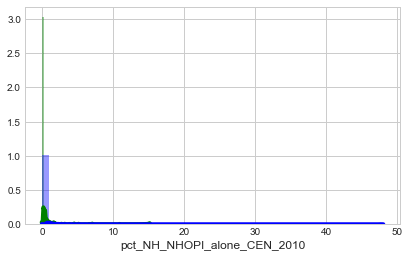

In [33]:
sns.distplot(with_superfund.pct_NH_NHOPI_alone_CEN_2010, color='green')
sns.distplot(without_superfund.pct_NH_NHOPI_alone_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


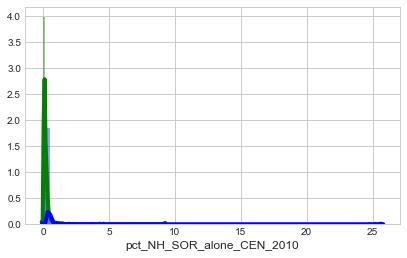

In [34]:
sns.distplot(with_superfund.pct_NH_SOR_alone_CEN_2010, color='green')
sns.distplot(without_superfund.pct_NH_SOR_alone_CEN_2010, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


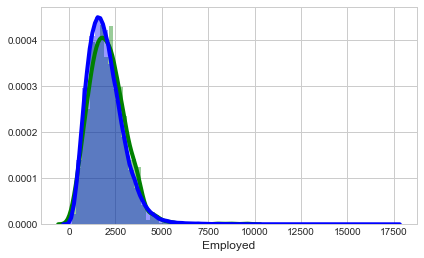

In [35]:
sns.distplot(with_superfund.Employed, color='green')
sns.distplot(without_superfund.Employed, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


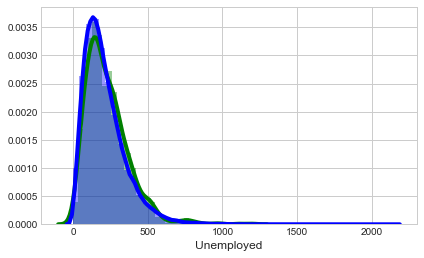

In [36]:
sns.distplot(with_superfund.Unemployed, color='green')
sns.distplot(without_superfund.Unemployed, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


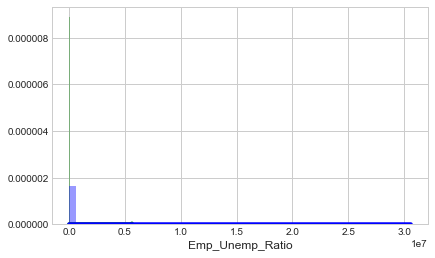

In [37]:
sns.distplot(with_superfund.Emp_Unemp_Ratio, color='green')
sns.distplot(without_superfund.Emp_Unemp_Ratio, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


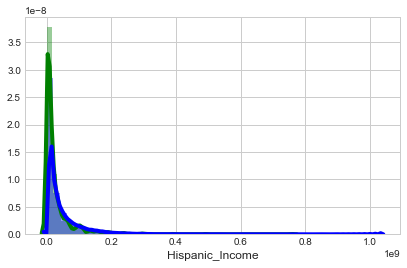

In [38]:
sns.distplot(with_superfund.Hispanic_Income, color='green')
sns.distplot(without_superfund.Hispanic_Income, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


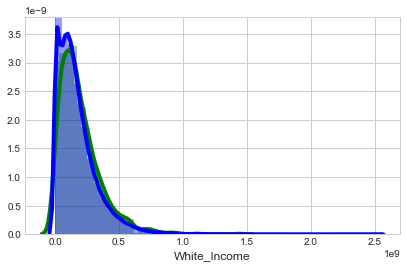

In [39]:
sns.distplot(with_superfund.White_Income, color='green')
sns.distplot(without_superfund.White_Income, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


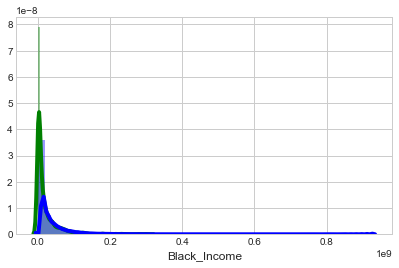

In [40]:
sns.distplot(with_superfund.Black_Income, color='green')
sns.distplot(without_superfund.Black_Income, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


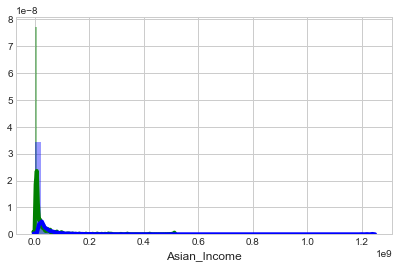

In [41]:
sns.distplot(with_superfund.Asian_Income, color='green')
sns.distplot(without_superfund.Asian_Income, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


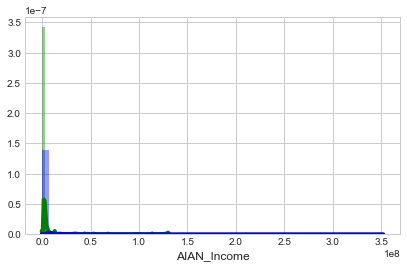

In [42]:
sns.distplot(with_superfund.AIAN_Income, color='green')
sns.distplot(without_superfund.AIAN_Income, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


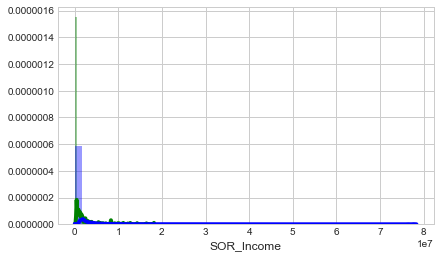

In [43]:
sns.distplot(with_superfund.SOR_Income, color='green')
sns.distplot(without_superfund.SOR_Income, color='blue')

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


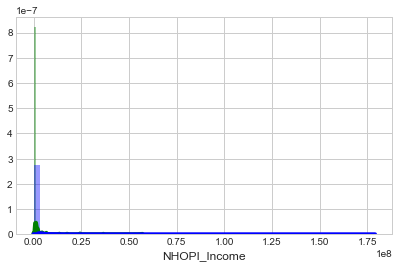

In [44]:
sns.distplot(with_superfund.NHOPI_Income, color='green')
sns.distplot(without_superfund.NHOPI_Income, color='blue')

Since all my features are similar in distribution, thus they cannot discriminate between my classes, I will diver deeper into descriptive statistics.

In [45]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

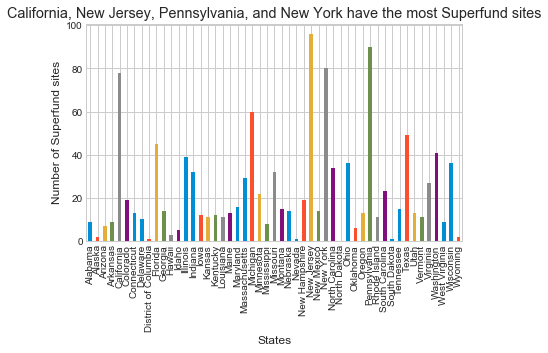

In [9]:
df.groupby(['State_name'])['has_superfund'].sum().plot(kind='bar', sort_columns=True)
plt.xlabel('States', fontsize='large')
plt.title('California, New Jersey, Pennsylvania, and New York have the most Superfund sites')
plt.ylabel('Number of Superfund sites', fontsize='large')
plt.show()

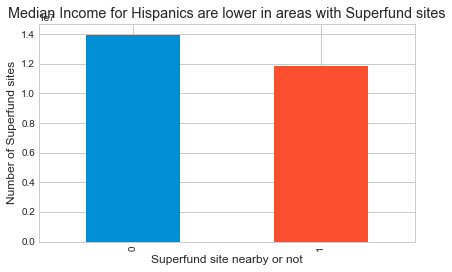

In [40]:
df.groupby(['has_superfund'])['Hispanic_Income'].median().plot(kind='bar')
plt.xlabel('Superfund site nearby or not', fontsize='large')
plt.title('Median Income for Hispanics are lower in areas with Superfund sites')
plt.ylabel('Number of Superfund sites', fontsize='large')
plt.xticks(rotation=90)
plt.show()

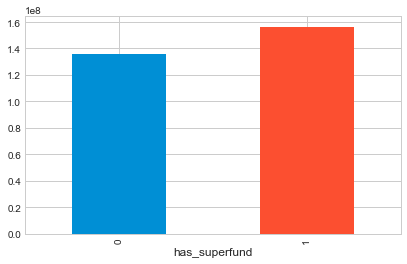

In [23]:
df.groupby(['has_superfund'])['White_Income'].median().plot(kind='bar')

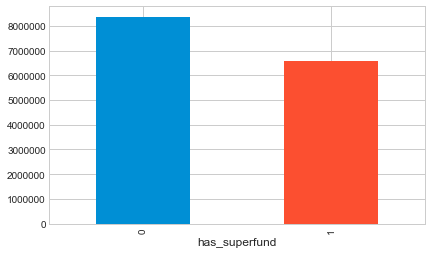

In [21]:
df.groupby(['has_superfund'])['Black_Income'].median().plot(kind='bar')

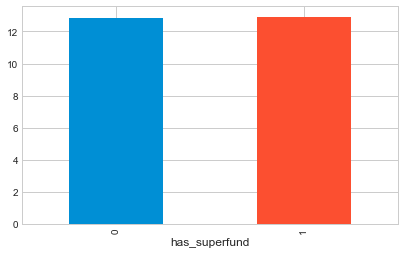

In [28]:
df.groupby(['has_superfund'])['pct_Prs_Blw_Pov_Lev_ACS_09_13'].median().plot(kind='bar')

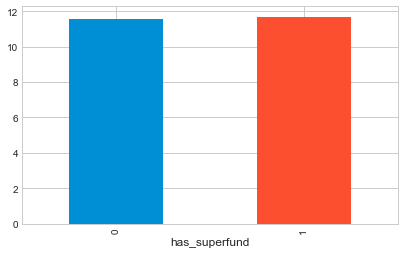

In [29]:
df.groupby(['has_superfund'])['pct_Not_HS_Grad_ACS_09_13.1'].median().plot(kind='bar')

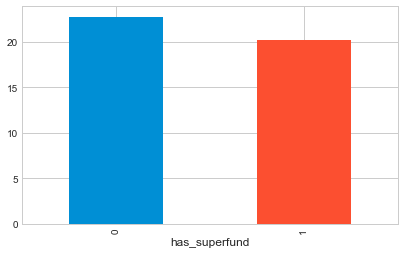

In [30]:
df.groupby(['has_superfund'])['pct_College_ACS_09_13'].median().plot(kind='bar')

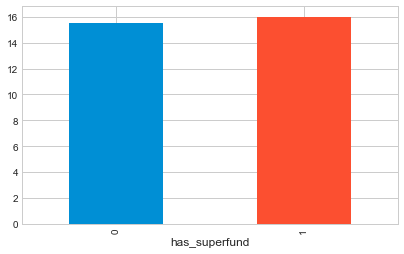

In [31]:
df.groupby(['has_superfund'])['pct_TwoPHealth_Ins_ACS_09_13'].median().plot(kind='bar')

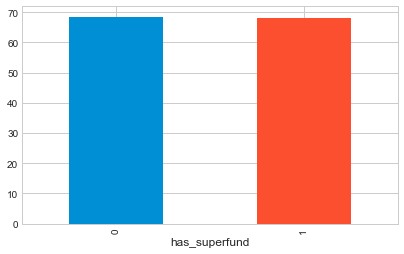

In [32]:
df.groupby(['has_superfund'])['pct_One_Health_Ins_ACS_09_13'].median().plot(kind='bar')

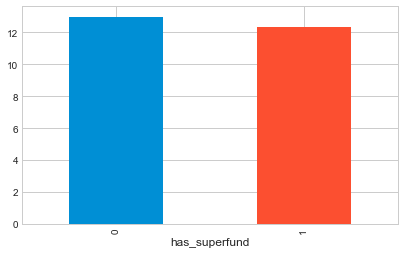

In [33]:
df.groupby(['has_superfund'])['pct_No_Health_Ins_ACS_09_13'].median().plot(kind='bar')